In [1]:
## We load the relevant modules

#matplotlib
%matplotlib inline
import matplotlib.pylab as plt

#import auxiliar functions
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(1, parentdir)
from utils.helper_functions import *

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import ipywidgets
from math import floor, ceil
import random
import time
import scipy

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score, confusion_matrix
from sklearn import preprocessing

np.random.seed(3123) # impose random seed for reproducibility (random seed used in class)

## Data manipulation and load csv

In [ ]:
train_df = pd.read_csv("../Data/train.csv")
X_train = train_df.drop(['target'], axis=1) # target should be replaced by the label
y_train = train_df['target']

test_df = pd.read_csv("../Data/test.csv")
X_test = test_df.drop(['target'], axis=1) # if we do not have the taerget, we do not have to drop it
#X_test = pd.read_csv("../Data/test.csv") if y test is not given
#y_test = test_df['target'] # maybe we do not have it, check it

print(X_train.shape)
X_train.head()


In [33]:
##drop irrelevant dependent variables and create dependent and independent variables##

# Just for simplicity, drop categorical variables, dates and id vars
#data = data.drop(['body','ticket','cabin','embarked','home.dest','boat'], axis=1)
#print(data.shape)
#data.head()

##EXTRA##
# Set binary to dummy
#data = pd.get_dummies(data, prefix = ['sex'], columns = ['sex'], drop_first = True)## the prefix is how to name the dummies
#data.columns


X_train = X_train.drop(['body','ticket','cabin','embarked','home.dest','boat'], axis=1)
print(X_train.shape)
X_train.head()

X_test = X_test.drop(['body','ticket','cabin','embarked','home.dest','boat'], axis=1)
print(X_test.shape)
X_test.head()


(1309, 8)


Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'fare',
       'sex_male'],
      dtype='object')

In [34]:
#NA search (nulls per feature)
Nulls_train = X_train.isnull().sum()
Nulls_test = X_test.isnull().sum()

# We have to check both X_train and X_test

print(Nulls_train)
print(Nulls_test)

# Identifying Columns with Null variables
missing_data_col_X_train = X_train.columns[Nulls_train>0]
missing_data_col_X_test = X_test.columns[Nulls_test>0]
missing_data_col_X_train
missing_data_col_X_test

pclass        0
survived      0
name          0
age         263
sibsp         0
parch         0
fare          1
sex_male      0
dtype: int64


Index(['age', 'fare'], dtype='object')

In [35]:
#independent and dependent variables split

#X = data.drop(['survived'], axis = 1) 
#y = data["survived"]  # This is the classification outcome: survived/not survived

#print(X.shape)
#y.unique()

(1309, 7)


array([1, 0])

In [36]:
#Randomly split into training and test sets

#X_train0, X_test0, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, train_size = 0.75) 

#X_train = X_train0.copy()
#X_test = X_test0.copy()

#X_train = X_train.drop(['name'], axis=1)
#X_test = X_test.drop(['name'], axis=1)



In [37]:
## Remove columns with any missing data ##

initial_columns = X_train.columns

print(X_train.shape)
my_percentage_valid = 0.2 #This percentage indicates the number of vaalid answers required to keep a column (if we increase it, there is more chance to eliminate more columns)
X_train = X_train.dropna(axis=1, thresh=round(my_percentage_valid * len(X_train.index)))
print(X_train.shape)

dropped_columns = list(set(initial_columns) - set(X_train.columns))

X_test = X_test.drop(columns=dropped_columns)


X_train.isnull().sum() #check there is no longer missing data You can also do it with X_test


(981, 6)
(981, 6)


pclass        0
age         197
sibsp         0
parch         0
fare          1
sex_male      0
dtype: int64

In [38]:
## Imputer ##

#NA search (nulls per feature)
Nulls_remaining_train = X_train.isnull().sum()
Nulls_remaining_test = X_test.isnull().sum()

print(Nulls_remaining_train)
print(Nulls_remaining_test)

pclass        0
age         197
sibsp         0
parch         0
fare          1
sex_male      0
dtype: int64
pclass      0
age         0
sibsp       0
parch       0
fare        0
sex_male    0
dtype: int64


In [ ]:
#Impute Nan

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'median')

imp_mean.fit(X_train)

X_train = pd.DataFrame(imp_mean.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(imp_mean.transform(X_test), columns = X_test.columns)

print(X_train.isnull().sum())
print(X_test.isnull().sum())


# Identifying Columns with Null variables
#missing_data_col_remaining = X_train.columns[Nulls_remaining > 0]
#missing_data_col_remaining

#fill by some summary statistics associated with the whole column

#for my_col in missing_data_col_remaining: ## for every column with missing data
    #X_train[my_col].fillna(X_train[my_col].mean(),inplace = True)
    #X_test[my_col].fillna(X_train[my_col].mean(),inplace = True)

# Check missing data
#print(X_train.isnull().sum().sum())

##EXTRA##
#Try the same for loop, but with median instead. After this, check performance

In [39]:
##scale the data##

scaler = preprocessing.StandardScaler(with_mean = True, with_std = True)
scaler.fit(X_train) ## Fitted to the training set (Train the scaler)
#Apply the scaler to both training and test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#View data
X_train = pd.DataFrame(X_train) 
X_test = pd.DataFrame(X_test)

#X_train.describe()

In [40]:
###############
## KNN model ##
###############

#KNN model

MyKNN = KNeighborsClassifier()

/Users/bertacanal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bertacanal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bertacanal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bertacanal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bertac

best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}
best score:      0.79814 (+/-0.03296)


/Users/bertacanal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.74108163        nan 0.77169388        nan 0.77271429
        nan 0.7727551         nan 0.77987755        nan 0.77989796
        nan 0.78493878 0.73908163 0.73908163 0.79306122 0.76965306
 0.79814286 0.77373469 0.79304082 0.7727551  0.79097959 0.77987755
 0.79406122 0.77989796 0.79502041 0.78493878 0.73908163 0.73908163
 0.79204082 0.76965306 0.79712245 0.77271429 0.79304082 0.7727551
 0.79097959 0.77987755 0.79508163 0.77989796 0.794      0.78493878]
  warnings.warn(


param_algorithm param_n_neighbors param_weights  \
18       ball_tree                10       uniform   
32         kd_tree                10       uniform   
38         kd_tree                40       uniform   
26       ball_tree                50       uniform   
24       ball_tree                40       uniform   
40         kd_tree                50       uniform   
16       ball_tree                 5       uniform   
20       ball_tree                20       uniform   
34         kd_tree                20       uniform   
30         kd_tree                 5       uniform   
36         kd_tree                30       uniform   
22       ball_tree                30       uniform   
27       ball_tree                50      distance   
41         kd_tree                50      distance   
13           brute                50      distance   

                                               params  split0_test_score  \
18  {'algorithm': 'ball_tree', 'n_neighbors': 10, ...               0.82   
32  {'algorithm': 'kd_tree', 'n_neighbors': 10, 'w...               0.82   
38  {'algorithm': 'kd_tree', 'n_neighbors': 40, 'w...               0.82   
26  {'algorithm': 'ball_tree', 'n_neighbors': 50, ...               0.88   
24  {'algorithm': 'ball_tree', 'n_neighbors': 40, ...               0.82   
40  {'algorithm': 'kd_tree', 'n_neighbors': 50, 'w...               0.88   
16  {'algorithm': 'ball_tree', 'n_neighbors': 5, '...               0.80   
20  {'algorithm': 'ball_tree', 'n_neighbors': 20, ...               0.82   
34  {'algorithm': 'kd_tree', 'n_neighbors': 20, 'w...               0.82   
30  {'algorithm': 'kd_tree', 'n_neighbors': 5, 'we...               0.80   
36  {'algorithm': 'kd_tree', 'n_neighbors': 30, 'w...               0.84   
22  {'algorithm': 'ball_tree', 'n_neighbors': 30, ...               0.84   
27  {'algorithm': 'ball_tree', 'n_neighbors': 50, ...               0.76   
41  {'algorithm': 'kd_tree', 'n_neighbors': 50, 'w...               0.76   
13  {'algorithm': 'brute', 'n_neighbors': 50, 'wei...               0.76   

    split1_test_score  split2_test_score  split3_test_score  \
18           0.795918           0.816327           0.795918   
32           0.795918           0.816327           0.795918   
38           0.775510           0.775510           0.775510   
26           0.816327           0.755102           0.734694   
24           0.775510           0.775510           0.755102   
40           0.816327           0.755102           0.734694   
16           0.775510           0.836735           0.775510   
20           0.795918           0.734694           0.714286   
34           0.795918           0.734694           0.714286   
30           0.775510           0.836735           0.795918   
36           0.795918           0.734694           0.734694   
22           0.795918           0.734694           0.734694   
27           0.734694           0.795918           0.734694   
41           0.734694           0.795918           0.734694   
13           0.734694           0.795918           0.734694   

    split4_test_score  split5_test_score  ...  split13_test_score  \
18           0.795918           0.816327  ...            0.816327   
32           0.795918           0.816327  ...            0.816327   
38           0.816327           0.795918  ...            0.795918   
26           0.816327           0.816327  ...            0.775510   
24           0.816327           0.795918  ...            0.795918   
40           0.816327           0.816327  ...            0.775510   
16           0.836735           0.775510  ...            0.857143   
20           0.836735           0.816327  ...            0.795918   
34           0.836735           0.816327  ...            0.795918   
30           0.836735           0.775510  ...            0.857143   
36           0.816327           0.795918  ...            0.755102   
22           0.816327           0.795918  ...            0.755102   
27           0.

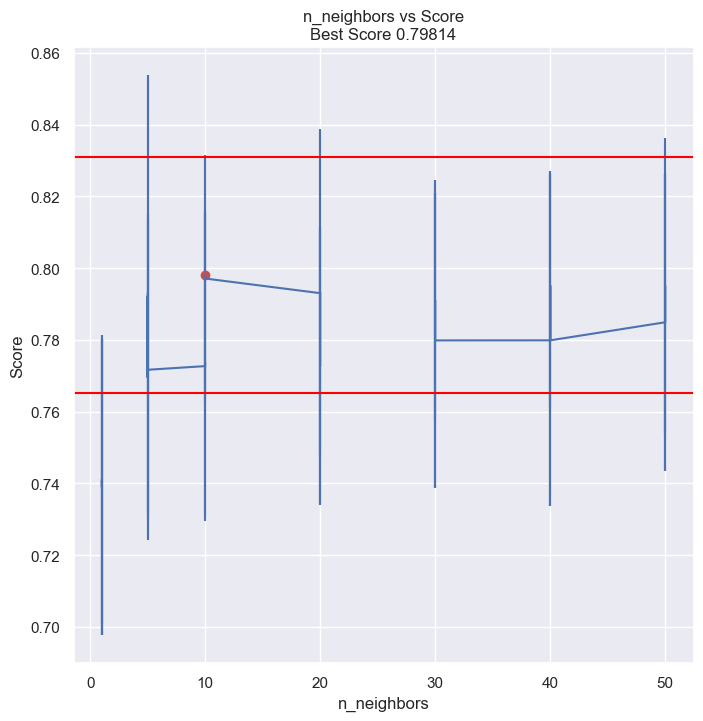

In [41]:
#Specify grid values for CV

grid_values = {'n_neighbors':[1, 5, 10, 20, 30, 40, 50], 'weights':['uniform','distance'], 'algorithm':['brute', 'ball_tree', 'kd_tree']}

#Grid Search
from sklearn.model_selection import GridSearchCV

grid_knn_acc = GridSearchCV(MyKNN, param_grid = grid_values, scoring = 'accuracy', n_jobs = -1, cv = 20) # CV defines the number of folds 
# n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. Berta: Maybe try with 3 if -1 does not work.


#Fit the model
grid_knn_acc.fit(X_train, y_train)

# Report best Number of Neighbors
GridSearch_table_plot(grid_knn_acc, "n_neighbors", negative=False, display_all_params=False) #From Utils document!
#print('Best k parameter : '+ str(grid_knn_acc.best_estimator_.n_neighbors))
#print('Best weights parameter : '+ str(grid_knn_acc.best_estimator_.weights))

In [42]:
#Predicting from the optimal model + assessing model performance

insample_y_pred_acc = grid_knn_acc.predict(X_train) #TRAIN

# Compute different Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix

print('Accuracy Score : ' + str(accuracy_score(y_train,insample_y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_train,insample_y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_train,insample_y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_train,insample_y_pred_acc)))


Accuracy Score : 0.8307849133537207
Precision Score : 0.8392857142857143
Recall Score : 0.6601123595505618
F1 Score : 0.738993710691824


Accuracy Score : 0.7774390243902439
Precision Score : 0.8446601941747572
Recall Score : 0.6041666666666666
F1 Score : 0.7044534412955465
Confusion matrix


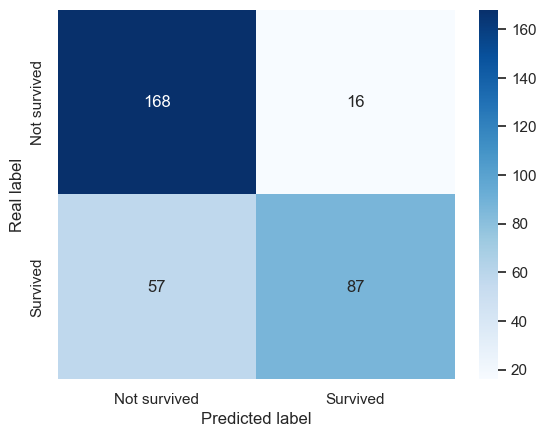

y actual : 
0    184
1    144
Name: survived, dtype: int64
y predicted : 
0    225
1    103
dtype: int64


In [43]:
#MAYBE THIS CANNOT BE DONE BECAUSE WE DONT HAVE Y TEST
#Predict values based on optimized parameters 
y_pred_acc = grid_knn_acc.predict(X_test) #TEST

# Compute different Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Confusion matrix
print("Confusion matrix")
cm=confusion_matrix(y_test,y_pred_acc)
plot_confusion_matrix(cm, ['Not survived','Survived'])
#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))
#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred_acc).value_counts()))

In [44]:
# CSV generation

y_pred = grid_knn_acc.predict(X_test)
y_pred_proba = grid_knn_acc.predict_proba(X_test)


test_kaggle = X_test[['name']] ## The unique ID (one column that identifies each row)

test_kaggle.insert(1, "target", y_pred_proba) #target is the label


test_kaggle.head()


328
            0             1         2         3         4        5  survived  \
0    0.836547  4.470911e-01 -0.498313 -0.433006 -0.506545  0.74146         0   
1    0.836547 -7.393890e-01  0.439969  0.673189 -0.342219  0.74146         1   
2    0.836547  5.620299e-16 -0.498313 -0.433006 -0.491845  0.74146         0   
3    0.836547  5.620299e-16 -0.498313 -0.433006 -0.488905  0.74146         0   
4    0.836547  5.620299e-16 -0.498313 -0.433006 -0.494626  0.74146         0   
..        ...           ...       ...       ...       ...      ...       ...   
323 -1.549072  2.888938e-01 -0.498313 -0.433006  2.247736 -1.34869         1   
324  0.836547 -2.647969e-01  0.439969 -0.433006 -0.366772  0.74146         0   
325  0.836547 -6.602903e-01  1.378250 -0.433006 -0.181867  0.74146         0   
326 -0.356262  8.425845e-01 -0.498313 -0.433006 -0.337293  0.74146         0   
327 -0.356262 -6.602903e-01 -0.498313  0.673189 -0.241939 -1.34869         1   

     pi_i  
0     0.0  
1     0.3  

In [45]:
#CSV generator
test_kaggle.to_csv("test_kaggle.csv", index = False)